In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ln -s /content/drive/My\ Drive/ /mydrive

In [3]:
!ls 

drive  sample_data


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('/mydrive/ManojSirIntern/Normalised_data_final.csv')

In [6]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,OutPut
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.483414,0.966827,0.842016,0.825816,0.930746,0.779426,0.752550,0.761386,0.778322,...,0.436287,0.090571,0.279077,0.693642,0.359707,0.333935,0.329885,0.192924,0.390634,0.399102,0.704319,0.662715,0.587239,0.193660,0.307426,0.376643,0.371120,0.427819,0.453592,0.448437,0.769117,0.260300,0.232318,0.315158,0.385847,0.301903,0.461323,0.290858,0.315894,0.372593,0.366702,0.622952,0.279813,1.000000,0.664556,0.974559,0.690328,0.656824,0.549317,1
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037017,0.074034,0.032546,0.038984,0.058655,0.049714,0.036481,0.022890,0.031474,...,0.717811,0.820458,0.592990,0.691345,1.000000,0.973176,0.681688,0.921674,1.000000,0.891273,1.000000,0.623391,0.913805,0.680973,0.471745,0.500358,0.508226,0.383405,0.566881,0.478898,0.966023,0.431330,0.516094,0.618741,0.606223,0.295064,0.814020,0.503219,0.740343,0.232475,0.357296,0.421316,0.664878,0.958512,0.664163,0.521817,0.458512,0.692775,0.569385,1
4,4,0.144214,0.170073,0.189467,0.227759,0.177035,0.211348,0.191954,0.175543,0.169576,0.042270,0.043761,0.280471,0.189467,0.323736,0.457009,0.387389,0.349097,0.360535,0.316774,0.319757,0.392362,0.370978,0.347606,0.395345,0.377443,0.165100,0.179522,0.266050,0.235218,0.183003,0.175543,0.536078,0.439604,0.416232,0.393356,0.395843,0.370481,0.265055,0.321249,...,0.500771,1.000000,0.410761,0.794669,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.801631,0.640012,0.729027,0.451539,0.442091,0.709135,0.000000,0.000000,0.247650,0.495301,0.553484,0.500771,0.484858,0.475409,0.471431,0.527127,0.500274,0.536576,0.542543,0.883684,0.515689,0.761848,0.671838,0.608185,0.730021,0.813069,0.902084,0.915510,0.860809,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [7]:
df.drop(['Unnamed: 0'],axis =1,inplace=True)

In [8]:
Y = df['OutPut']
df.drop(['OutPut'],axis=1,inplace=True)

In [9]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
33836    0
33837    0
33838    0
33839    0
33840    0
Name: OutPut, Length: 33841, dtype: int64

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.483414,0.966827,0.842016,0.825816,0.930746,0.779426,0.752550,0.761386,0.778322,0.742241,...,0.769117,0.436287,0.090571,0.279077,0.693642,0.359707,0.333935,0.329885,0.192924,0.390634,0.399102,0.704319,0.662715,0.587239,0.193660,0.307426,0.376643,0.371120,0.427819,0.453592,0.448437,0.769117,0.260300,0.232318,0.315158,0.385847,0.301903,0.461323,0.290858,0.315894,0.372593,0.366702,0.622952,0.279813,1.000000,0.664556,0.974559,0.690328,0.656824,0.549317
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037017,0.074034,0.032546,0.038984,0.058655,0.049714,0.036481,0.022890,0.031474,0.035050,...,0.719242,0.717811,0.820458,0.592990,0.691345,1.000000,0.973176,0.681688,0.921674,1.000000,0.891273,1.000000,0.623391,0.913805,0.680973,0.471745,0.500358,0.508226,0.383405,0.566881,0.478898,0.966023,0.431330,0.516094,0.618741,0.606223,0.295064,0.814020,0.503219,0.740343,0.232475,0.357296,0.421316,0.664878,0.958512,0.664163,0.521817,0.458512,0.692775,0.569385
4,0.144214,0.170073,0.189467,0.227759,0.177035,0.211348,0.191954,0.175543,0.169576,0.042270,0.043761,0.280471,0.189467,0.323736,0.457009,0.387389,0.349097,0.360535,0.316774,0.319757,0.392362,0.370978,0.347606,0.395345,0.377443,0.165100,0.179522,0.266050,0.235218,0.183003,0.175543,0.536078,0.439604,0.416232,0.393356,0.395843,0.370481,0.265055,0.321249,0.328709,...,0.699189,0.500771,1.000000,0.410761,0.794669,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.801631,0.640012,0.729027,0.451539,0.442091,0.709135,0.000000,0.000000,0.247650,0.495301,0.553484,0.500771,0.484858,0.475409,0.471431,0.527127,0.500274,0.536576,0.542543,0.883684,0.515689,0.761848,0.671838,0.608185,0.730021,0.813069,0.902084,0.915510,0.860809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

#plot

In [ ]:
abn = df.iloc[4]
normal = df.iloc[33837]


<Figure size 1440x360 with 0 Axes>

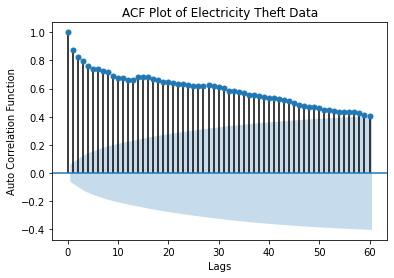

In [ ]:
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize = (20,5))
plot_acf(abn,lags = 60)
plt.title('ACF Plot of Electricity Theft Data')
plt.ylabel('Auto Correlation Function')
plt.xlabel('Lags')
plt.show()

<Figure size 720x360 with 0 Axes>

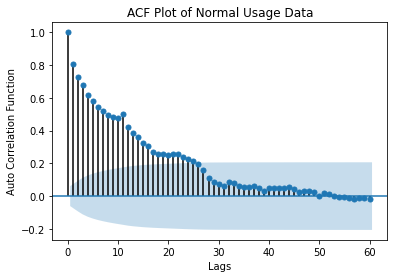

In [ ]:
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize = (10,5))
plot_acf(normal,lags = 60)
plt.title('ACF Plot of Normal Usage Data')
plt.ylabel('Auto Correlation Function')
plt.xlabel('Lags')
plt.show()

<Figure size 720x360 with 0 Axes>

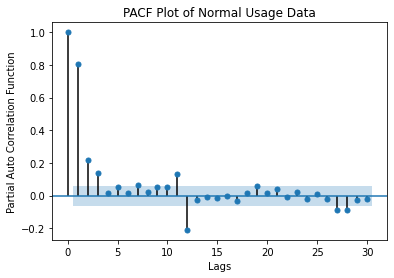

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize = (10,5))
plot_pacf(normal,lags = 30)
plt.title('PACF Plot of Normal Usage Data')
plt.ylabel('Partial Auto Correlation Function')
plt.xlabel('Lags')
plt.show()

<Figure size 720x360 with 0 Axes>

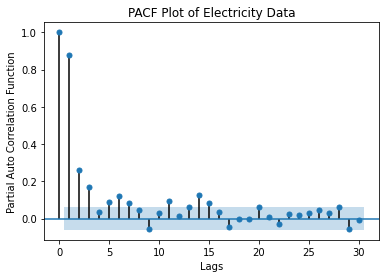

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize = (10,5))
plot_pacf(abn,lags = 30)
plt.title('PACF Plot of Electricity Data')
plt.ylabel('Partial Auto Correlation Function')
plt.xlabel('Lags')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


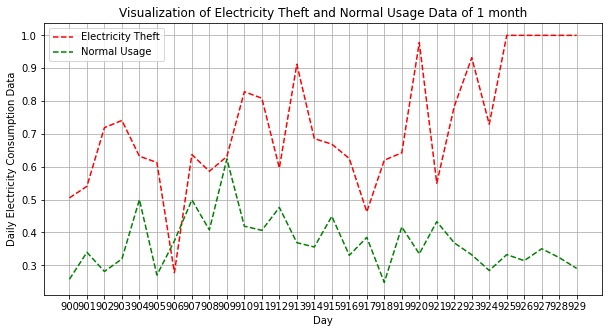

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(abn[900:930],'r--',label = 'Electricity Theft')
plt.plot(normal[900:930],'g--', label = 'Normal Usage')

plt.legend(loc = 'upper left')

plt.title('Visualization of Electricity Theft and Normal Usage Data of 1 month')
plt.xlabel('Day')
plt.ylabel('Daily Electricity Consumption Data')
plt.grid(which='major', axis='both' )
plt.savefig('Pic.jpeg')
plt.show()

(7,)
(7,)
(7,)
(7,)


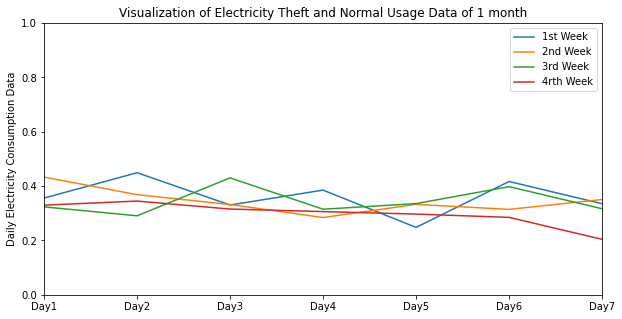

In [ ]:
r = 914
w1 = normal[r:r+7]
w2 = normal[r+7:r+14]
w3 = normal[r+14:r+21]
w4 = normal[r+21:r+28]
print(w1.shape)
print(w2.shape)
print(w3.shape)
print(w4.shape)
x = ['Day1','Day2','Day3','Day4','Day5','Day6','Day7']
plt.figure(figsize = (10,5))
plt.plot(x,w1,label = '1st Week')
plt.plot(x,w2,label = '2nd Week')
plt.plot(x,w3,label = '3rd Week')
plt.plot(x,w4,label = '4rth Week')
plt.axis([0, 6, 0, 1])
plt.legend() #loc = 'upper left'

plt.title('Visualization of Electricity Theft and Normal Usage Data of 1 month')

plt.ylabel('Daily Electricity Consumption Data')
#plt.grid(which='major', axis='both' )
plt.savefig('Pic.jpeg')
plt.show()

In [ ]:

x = np.array(df)
y = np.array(Y)

In [ ]:
print(x.shape)
print(y.shape)

(33841, 1034)
(33841,)


In [ ]:

model = Sequential()
model.add(Dense(1034, activation='relu',input_dim = 1034))
model.add(Dense(500, activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(500, activation='tanh'))
model.add(Dense(700, activation='tanh'))
model.add(Dense(1034, activation='relu'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt)

In [ ]:
history = model.fit(x, x, epochs=20, verbose=1,batch_size=5,shuffle = False)


In [ ]:
x = model.predict(x)
print(x.shape)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(x)

In [ ]:
x_pca = pca.transform(x)
print(x_pca.shape)

#Code

In [15]:
x = np.array(df)
print(x.shape)


(33841, 1034)


In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.40) #random_state=42

In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20304, 1034)
(20304,)
(13537, 1034)
(13537,)


#CNN Model

In [80]:
x_train = x_train.reshape(x_train.shape[0],94,11)
x_test = x_test.reshape(x_test.shape[0],94,11)
#x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
#x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
#y_train = y_train.reshape(y_train.shape[0],1)
#y_test = y_test.reshape(y_test.shape[0],1)

In [75]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20304, 94, 11)
(20304,)
(13537, 94, 11)
(13537,)


In [24]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

from keras.optimizers import Adam

In [76]:
#n_steps,n_features = ,11
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(94,11)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
history = model.fit(x_train, y_train, epochs=50, verbose=1,batch_size=10, validation_data=(x_test, y_test),shuffle = True)


Epoch 1/50
2031/2031 [==============================] - 9s 4ms/step - loss: 0.3359 - accuracy: 0.8909 - val_loss: 0.3109 - val_accuracy: 0.8960
Epoch 2/50
2031/2031 [==============================] - 8s 4ms/step - loss: 0.3156 - accuracy: 0.8935 - val_loss: 0.2978 - val_accuracy: 0.8992
Epoch 3/50
2031/2031 [==============================] - 8s 4ms/step - loss: 0.3025 - accuracy: 0.8969 - val_loss: 0.2965 - val_accuracy: 0.9012
Epoch 4/50
2031/2031 [==============================] - 9s 4ms/step - loss: 0.2914 - accuracy: 0.8993 - val_loss: 0.2896 - val_accuracy: 0.9006
Epoch 5/50
2031/2031 [==============================] - 8s 4ms/step - loss: 0.2825 - accuracy: 0.9028 - val_loss: 0.2874 - val_accuracy: 0.8996
Epoch 6/50
2031/2031 [==============================] - 8s 4ms/step - loss: 0.2710 - accuracy: 0.9049 - val_loss: 0.2972 - val_accuracy: 0.8986
Epoch 7/50
2031/2031 [==============================] - 9s 4ms/step - loss: 0.2614 - accuracy: 0.9069 - val_loss: 0.3178 - val_accuracy:

In [ ]:
x_test1 = x_test
y_test1 = y_test

In [ ]:
for i in range(2000):
   p =  random.randint()

#Convo1D

In [ ]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

from keras.optimizers import Adam

In [ ]:
n_steps,n_features = 50,1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, verbose=1,batch_size=5, validation_data=(x_test, y_test),shuffle = True)


#Evaluation

In [81]:
# evaluate the model


_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.940, Test: 0.938


#Plot Loss and Accuracy

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()


In [ ]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

#Prediction

In [82]:
y_pred = model.predict(x_test)
#probability Prediction

In [83]:
y_pred = model.predict_classes(x_test)

In [84]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [85]:
count=0
for i in y_pred:
  if (i!=0):
    count=count+1
print('predicted 1 : ',count)

count=0
for i in y_test:
  if (i!=0):
    count=count+1
print('actual 1 : ',count)

predicted 1 :  1156
actual 1 :  1448


In [86]:
len(y_pred)

13537

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.938095589864815

In [88]:
#Normalised False give no of correctly clasify sample
#Normalised True give percentage accuracy
count = accuracy_score(y_test, y_pred, normalize=False)
print('No of correctly classify sample ',count, ' out of ',len(y_test))

No of correctly classify sample  12699  out of  13537


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     12089
           1       0.76      0.61      0.68      1448

    accuracy                           0.94     13537
   macro avg       0.86      0.79      0.82     13537
weighted avg       0.93      0.94      0.93     13537



#Confusion Matrix

In [90]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11816   273]
 [  565   883]]


In [91]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


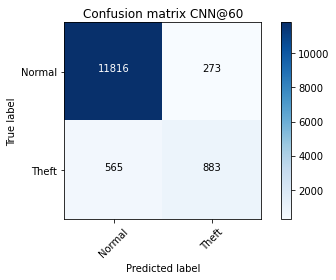

In [92]:

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Normal', 'Theft'],title='Confusion matrix CNN@60')

##Some Error

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=['Normal','Theft'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#ROC AUC

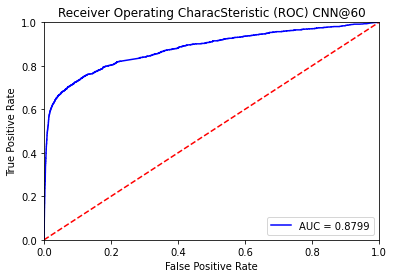

In [94]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict(x_test)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating CharacSteristic (ROC) CNN@60')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
print(model)

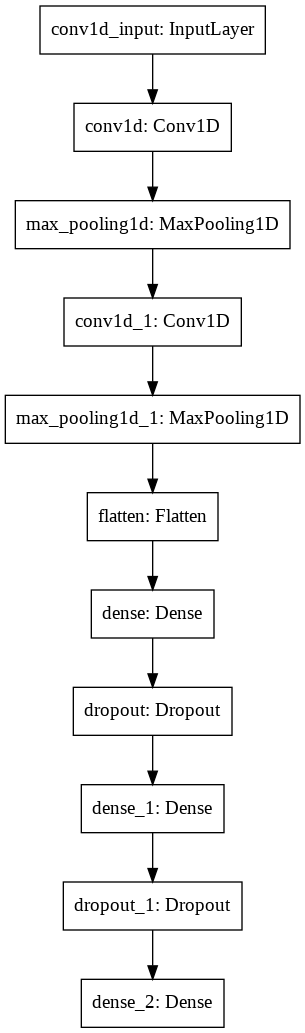

In [72]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)


In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 92, 64)            2176      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 46, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 44, 32)            6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 22, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 704)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               70500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0